In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
dataDir='data/'
dataType='test2014'
# algName = 'fakecap'
annFile='captions_test2014.json'
# subtypes=['results', 'evalImgs', 'eval']
# [resFile, evalImgsFile, evalFile]= ['%s/results/captions_%s_%s.json'%(dataDir,dataType,subtype) for subtype in subtypes]
resFile = 'captions_val2014_results.json'
# download Stanford models
# !./get_stanford_models.sh

In [3]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!


In [4]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 12409, 'reflen': 12074, 'guess': [12409, 11195, 9981, 8767], 'correct': [4674, 709, 79, 21]}
ratio: 1.0277455689911357
Bleu_1: 0.377
Bleu_2: 0.154
Bleu_3: 0.057
Bleu_4: 0.026
computing METEOR score...
METEOR: 0.084
computing Rouge score...
ROUGE_L: 0.285
computing CIDEr score...
CIDEr: 0.033


In [6]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.377
Bleu_2: 0.154
Bleu_3: 0.057
Bleu_4: 0.026
METEOR: 0.084
ROUGE_L: 0.285
CIDEr: 0.033


In [7]:
# # demo how to use evalImgs to retrieve low score result
# evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
# print 'ground truth captions'
# imgId = evals[0]['image_id']
# annIds = coco.getAnnIds(imgIds=imgId)
# anns = coco.loadAnns(annIds)
# coco.showAnns(anns)

# print '\n'
# print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
# annIds = cocoRes.getAnnIds(imgIds=imgId)
# anns = cocoRes.loadAnns(annIds)
# coco.showAnns(anns)

# img = coco.loadImgs(imgId)[0]
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# plt.imshow(I)
# plt.axis('off')
# plt.show()

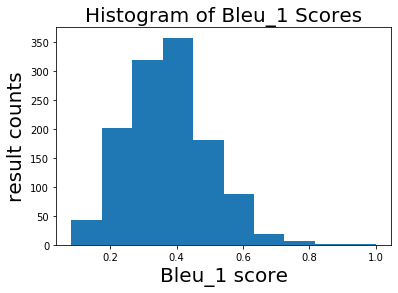

In [16]:
Bleu_1_scores = [eva['Bleu_1'] for eva in cocoEval.evalImgs]
plt.hist(Bleu_1_scores)
plt.title('Histogram of Bleu_1 Scores', fontsize=20)
plt.xlabel('Bleu_1 score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

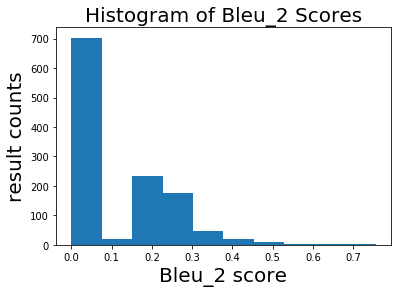

In [17]:
Bleu_2_scores = [eva['Bleu_2'] for eva in cocoEval.evalImgs]
plt.hist(Bleu_2_scores)
plt.title('Histogram of Bleu_2 Scores', fontsize=20)
plt.xlabel('Bleu_2 score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

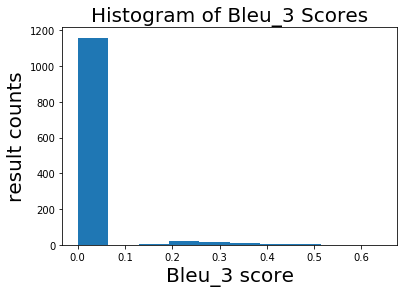

In [18]:
Bleu_3_scores = [eva['Bleu_3'] for eva in cocoEval.evalImgs]
plt.hist(Bleu_3_scores)
plt.title('Histogram of Bleu_3 Scores', fontsize=20)
plt.xlabel('Bleu_3 score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

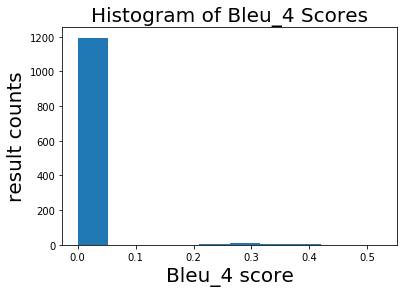

In [19]:
Bleu_4_scores = [eva['Bleu_4'] for eva in cocoEval.evalImgs]
plt.hist(Bleu_4_scores)
plt.title('Histogram of Bleu_4 Scores', fontsize=20)
plt.xlabel('Bleu_4 score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

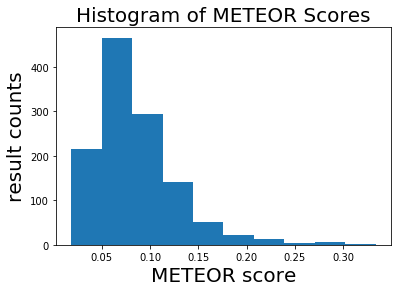

In [13]:
meteor_scores = [eva['METEOR'] for eva in cocoEval.evalImgs]
plt.hist(meteor_scores)
plt.title('Histogram of METEOR Scores', fontsize=20)
plt.xlabel('METEOR score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

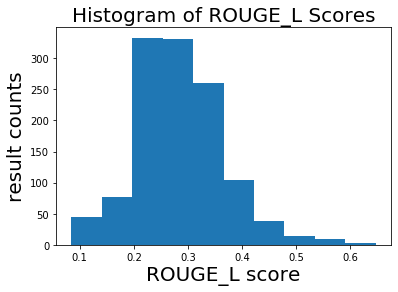

In [10]:
# plot score histogram
rouge_l_scores = [eva['ROUGE_L'] for eva in cocoEval.evalImgs]
plt.hist(rouge_l_scores)
plt.title('Histogram of ROUGE_L Scores', fontsize=20)
plt.xlabel('ROUGE_L score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

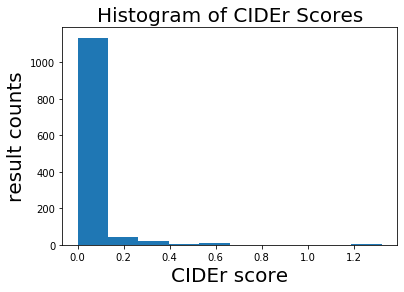

In [11]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [9]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))

NameError: name 'evalImgsFile' is not defined